In [2]:
from matplotlib import colors, cm
import matplotlib.pyplot as plt

import numpy as np
import math
import time
import utpy.utils
import utpy.vis
import flatpy

4.440892098500626e-16


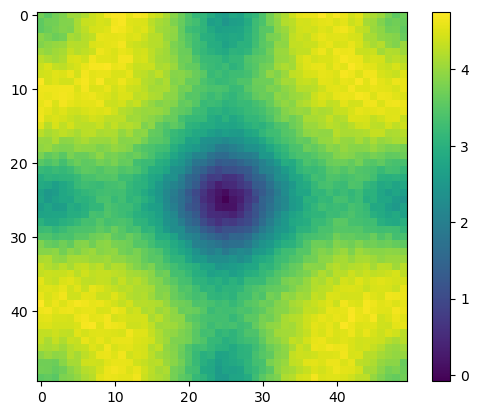

In [5]:
# create input data
foo = flatpy.nD.available_functions["ackley"]
fractional_noise_level=20
persistence = 0.665
n_clusters = 9
count = 10
noise_level = 0.01*persistence*fractional_noise_level
noise_model = "uniform"
ground_truth, ensemble = utpy.utils.generate_ensemble(foo, noise_level, count, noise_model)
ensemble = ensemble
ground_truth = ground_truth
print(np.min(ground_truth))
img = plt.imshow(ensemble[:,:,1])
plt.colorbar(img)

Time: 2.3052868843078613


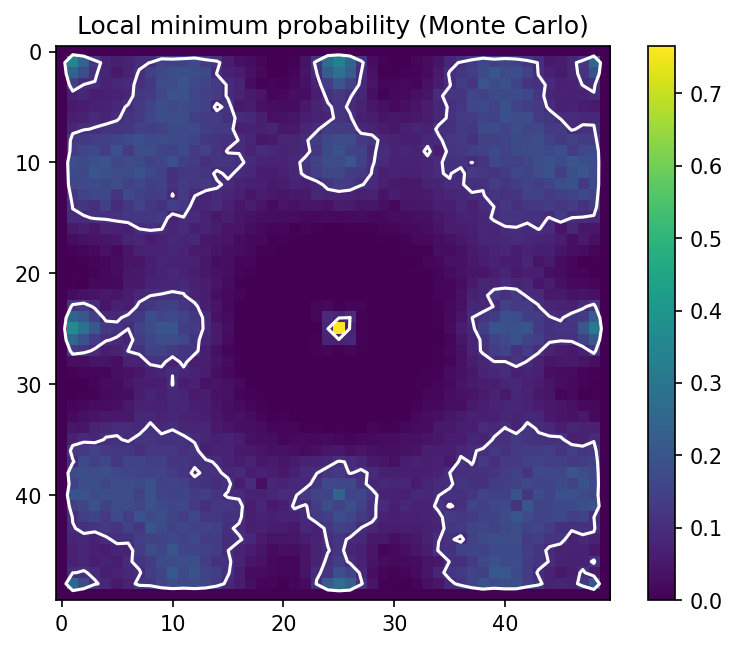

In [38]:
def MClocalMinimaProbabilityIndependentUniformWithBoundaryNotHandled(ensemble, numSamples):
    
    h, w, d = ensemble.shape
            
    minimumGrid = np.amin(ensemble, axis=2)
    maximumGrid = np.amax(ensemble, axis=2)    
        
    # perform sampling
    #numSamples = 10000
    minimaProbabilities = np.zeros((h,w))
    
    # the third dims are ensembles
    for i in range(h):
        for j in range(w):    
               
            # Compute empirically how frequently point is local maximum
            numTimesLocalMinimum = 0 
            localManimumProb = 0    
            if i >=1 and i<=h-2 and j >=1 and j<=w-2 : 
                #Estimate mean and covariance matrices from samples

                #Extracting min and max for all ensemble values at each point
                x1min = minimumGrid[i,j]
                x1max = maximumGrid[i,j]
                x2min = minimumGrid[i+1,j]
                x2max = maximumGrid[i+1,j]
                x3min = minimumGrid[i-1,j]
                x3max = maximumGrid[i-1,j]
                x4min = minimumGrid[i,j+1]
                x4max = maximumGrid[i,j+1]
                x5min = minimumGrid[i,j-1]
                x5max = maximumGrid[i,j-1]
                #x6min = minimumGrid[i+1,j-1]
                #x6max = maximumGrid[i+1,j-1]
                #x7min = minimumGrid[i+1,j+1]
                #x7max = maximumGrid[i+1,j+1]
                #x8min = minimumGrid[i-1,j-1]
                #x8max = maximumGrid[i-1,j-1]
                #x9min = minimumGrid[i-1,j+1]
                #x9max = maximumGrid[i-1,j+1]
                         
                x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
                x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
                x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
                x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))
                x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
                #x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                #x7Samples = np.random.uniform(low=x7min, high=x7max, size=(1,numSamples))
                #x8Samples = np.random.uniform(low=x8min, high=x8max, size=(1,numSamples))
                #x9Samples = np.random.uniform(low=x9min, high=x9max, size=(1,numSamples))
            
                for k in range(numSamples):    
                    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):    
                        numTimesLocalMinimum = numTimesLocalMinimum + 1                   

            localMinimumProb = numTimesLocalMinimum/numSamples
            minimaProbabilities[i,j] = localMinimumProb
                
    return minimaProbabilities# using monte carlo way to compute the critical point

# Visualize local minima probabilities :  Monte Carlo
numSamples = 2000
start = time.time()
localMinimumProbabilitiesMonteCarlo = MClocalMinimaProbabilityIndependentUniformWithBoundaryNotHandled(ensemble, numSamples)
end = time.time()
print('Time:',end - start)
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Local minimum probability (Monte Carlo)')
img2 = plt.imshow(localMinimumProbabilitiesMonteCarlo)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
plt.contour(localMinimumProbabilitiesMonteCarlo, levels=[0.1], colors='#FFFFFF')
plt.gcf().set_dpi(150)



Time: 0.05815601348876953
Max diff: 0.022903332094234424


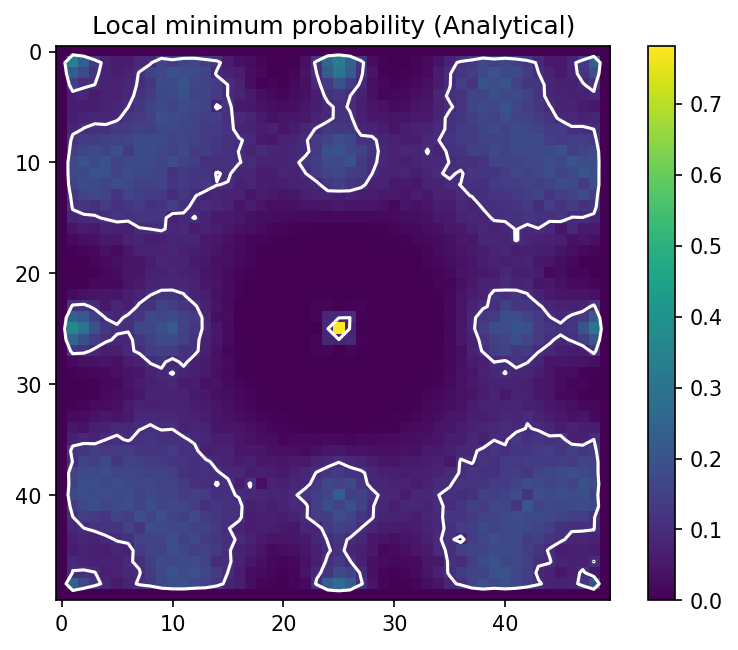

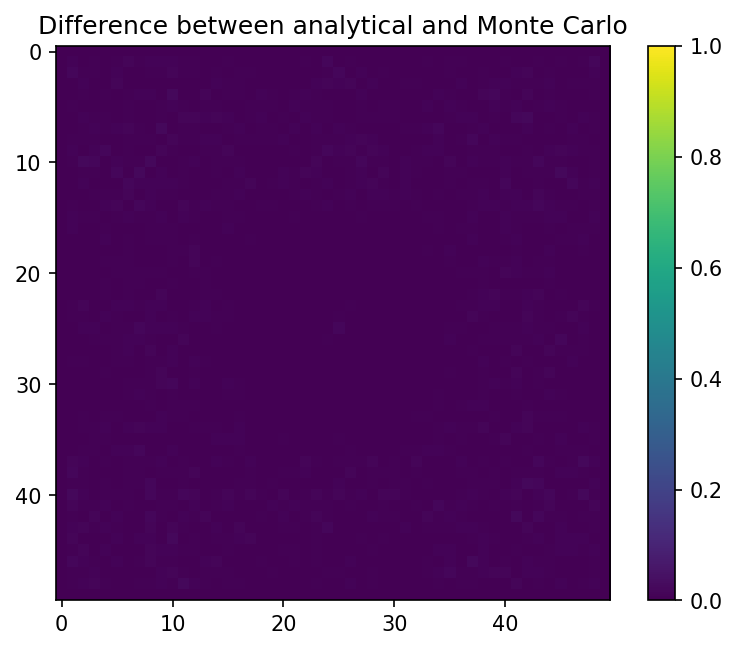

In [41]:
def computeIntegral(l=None, h=None, h2=None, h3=None, h4=None, h5=None, n1=1, n2=1, n3=1, n4=1, n5=1):
    
    intUp = 0
    intDown = 0
    
    normalizingFactor = 1/(n1*n2*n3*n4*n5)
    
    
    if (l is not None) and (h is not None) and  (h2 is None) and (h3 is None) and (h4 is None) and (h5 is None):
    
        intUp = normalizingFactor*h
        intDown = normalizingFactor*l
        
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is None) and (h4 is None) and (h5 is None):
        
        # Double check this
        intUp = normalizingFactor* (h2*h - h*h/2)
        intDown = normalizingFactor* (h2*l - l*l/2)
     
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is not None) and (h4 is None) and (h5 is None):
    
        intUp = normalizingFactor * (h3*h2*h - (h3+h2)*h*h/2 + h*h*h/3)
        intDown = normalizingFactor * (h3*h2*l - (h3+h2)*l*l/2 + l*l*l/3)
    
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is not None) and (h4 is not None) and (h5 is None):
    
        intUp = normalizingFactor * (h4*h3*h2*h - (h2*h3+h2*h4+h3*h4)*(h**2/2) + (h2+h3+h4)*(h**3/3) - h**4/4)
        intDown = normalizingFactor * (h4*h3*h2*l - (h2*h3+h2*h4+h3*h4)*(l**2/2) + (h2+h3+h4)*(l**3/3) - l**4/4)
        
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is not None) and (h4 is not None) and (h5 is not None):
        
        intUp = normalizingFactor * (h5*h4*h3*h2*h - (h2*h3*h4+h2*h3*h5+h2*h4*h5+h3*h4*h5)*(h**2/2) + (h2*h3+h2*h4+h2*h5+h3*h4+h3*h5+h4*h5)*(h**3/3) - (h2+h3+h4+h5)*(h**4/4) + h**5/5)
        intDown = normalizingFactor * (h5*h4*h3*h2*l - (h2*h3*h4+h2*h3*h5+h2*h4*h5+h3*h4*h5)*(l**2/2) + (h2*h3+h2*h4+h2*h5+h3*h4+h3*h5+h4*h5)*(l**3/3) - (h2+h3+h4+h5)*(l**4/4) + l**5/5)
        
    return (intUp-intDown)
        
def superOptimizedCase(indexOfa1,x1Limits, sortedI, w1):
    
    minimaProb = 0
    
    highLimits = []
    intervalWidths = []
    
    # The first 0,None are dummy for ease of indexing in next for loop
    upLimits = [0,None,None,None,None,None]
    normalizerWidths = [0, w1, 1,1,1,1]
    
    # Depending on how many intervals started before a1, it will properly set upper integral limits and normalizers
    # for the starting integral
    for k in range(indexOfa1):
        interval = sortedI[k]
        # leave first two elements as 0 and None
        upLimits[k+2] = interval[1]
        normalizerWidths[k+2] = interval[1]-interval[0]
    # out of loop    
    minimaProb = minimaProb + computeIntegral(l=x1Limits[indexOfa1],h=x1Limits[indexOfa1+1],h2=upLimits[2],h3=upLimits[3],h4=upLimits[4],h5=upLimits[5],n1=normalizerWidths[1],n2=normalizerWidths[2],n3=normalizerWidths[3],n4=normalizerWidths[4],n5=normalizerWidths[5])
        
    # Start piecewise integration where limits of each piece for X1 random variable are in xLimits array
    # Note that limits always are at start points of intervals fortunately, except the last one which is minimum
    # among all b's
    for j in range(indexOfa1+1,len(x1Limits)-1):
        
        interval = sortedI[j]
        upLimits[j+1] = interval[1]
        normalizerWidths[j+1] = interval[1]-interval[0]
        # within the loop
        minimaProb = minimaProb + computeIntegral(l=x1Limits[j],h=x1Limits[j+1],h2=upLimits[2],h3=upLimits[3],h4=upLimits[4],h5=upLimits[5],n1=normalizerWidths[1],n2=normalizerWidths[2],n3=normalizerWidths[3],n4=normalizerWidths[4],n5=normalizerWidths[5])
        
    return minimaProb

# Compute analytical local minimum probability
def superOptimizedAnlyticalLocalMinimumProbabilityComputation(a1,b1,a2,b2,a3,b3,a4,b4,a5,b5):
    
    # Go through list of intervals sorted by their starting points, and find interval from end of sorted list which 
    # contains bMin
    I1 = [a1,b1]
    I2 = [a2,b2]
    I3 = [a3,b3]
    I4 = [a4,b4]
    I5 = [a5,b5]

    w1 = b1-a1
    w2 = b2-a2
    w3 = b3-a3
    w4 = b4-a4
    w5 = b5-a5

    bMin = min([b1,b2,b3,b4,b5])
    #print('bMin:',bMin)

    # if bMin is smaller than a1, then return minima probability to be 0

    if (bMin <= a1):
        minimaProb = 0

    else:
        
        I = [I1,I2,I3,I4,I5]
        #print(I)
    
        # get interval order based on starting points
        startPointList = [a1, a2, a3, a4, a5]
        #print(startPointList)
        order = np.argsort(startPointList)
        #print(order)    

        sortedI = [I[order[0]],I[order[1]], I[order[2]], I[order[3]], I[order[4]]]
        #print('sortedI',sortedI)

        numIntervals = 4

        # Find the interval from end in a list sorted by starting points which contains bMin
        for i in reversed(range(numIntervals+1)):
            intervalFromEnd = sortedI[i]
            if (bMin >= intervalFromEnd[0]) and (bMin <= intervalFromEnd[1]):
                break;

        endInterval = i
        #print('endInterval', endInterval)

        # Sorted starts appended by bMin
        x1Limits = []

        for i in range(endInterval+1):
            interval = sortedI[i]    
            x1Limits.append(interval[0])
    
        x1Limits.append(bMin)
        #print(x1Limits)

        # Identify where start of interval of interest lies in x1Limits array. We start integrating from that point onward
        for i in range(len(x1Limits)):
    
            if x1Limits[i] == a1:  
                break
        
        indexOfa1 = i
        #print('indexOfa1',indexOfa1)

        minimaProb = superOptimizedCase(indexOfa1,x1Limits, sortedI, w1)
    
    #print('Minima probability', minimaProb)
    return minimaProb    

# Analytical way to compute local minima probabilities for ensembles
# TODO: Handle voxel probabilities on domain boundaries
def anlyticalLocalMinimaProbabilityIndependentUniformWithBoundaryNotHandled(ensemble):
    
    h, w, d = ensemble.shape
            
    minimumGrid = np.amin(ensemble, axis=2)
    maximumGrid = np.amax(ensemble, axis=2)    
        
    # perform sampling
    numSamples = 2000
    minimaProbabilities = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):    
               
            # Compute empirically how frequently point is local maximum
            numTimesLocalMinimum = 0 
            localManimumProb = 0    
            if i >=1 and i<=h-2 and j >=1 and j<=w-2 : 
                #Estimate mean and covariance matrices from samples
                x1min = minimumGrid[i,j]
                x1max = maximumGrid[i,j]
                x2min = minimumGrid[i+1,j]
                x2max = maximumGrid[i+1,j]
                x3min = minimumGrid[i-1,j]
                x3max = maximumGrid[i-1,j]
                x4min = minimumGrid[i,j+1]
                x4max = maximumGrid[i,j+1]
                x5min = minimumGrid[i,j-1]
                x5max = maximumGrid[i,j-1]
                
                localMinimumProb = superOptimizedAnlyticalLocalMinimumProbabilityComputation(x1min,x1max,x2min,x2max,x3min,x3max,x4min,x4max,x5min,x5max)
                minimaProbabilities[i,j] = localMinimumProb       

                
    return minimaProbabilities


#Using analytical solution to do the computation
#Visualize local minima probabilities :  Analytical

start = time.time()
localMinimumProbabilitiesAnalytical = anlyticalLocalMinimaProbabilityIndependentUniformWithBoundaryNotHandled(ensemble)
end = time.time()
print('Time:', end - start)
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Local minimum probability (Analytical)')
img2 = plt.imshow(localMinimumProbabilitiesAnalytical)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
plt.contour(localMinimumProbabilitiesAnalytical, levels=[0.1], colors='#FFFFFF')
plt.gcf().set_dpi(150)


#Visualize difference between analytical and Monte Carlo
diffImg = np.abs(localMinimumProbabilitiesMonteCarlo - localMinimumProbabilitiesAnalytical)
print("Max diff:", np.amax(diffImg))
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Difference between analytical and Monte Carlo')
img2 = plt.imshow(diffImg, vmin=0, vmax=1)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
#plt.contour(localMaximumProbabilitiesMonteCarlo, levels=[0.1], colors='#FFFFFF')
plt.gcf().set_dpi(150)


h, w = localMinimumProbabilitiesAnalytical.shape
for i in range(h):
    for j in range(w):
        if diffImg[i,j]>0.15:
            print('i',i)
            print('j',j)
